In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [2]:
path = '/Users/raisaurabh04/OneDrive/GreyAtom/Practice Dataset/EDA_dataset.csv'

df = pd.read_csv(path)

df.head()

X = df.iloc[ : , : -1]

X.head()

y = df.iloc[ : , -1]

y.head()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

print(X_train)
print(X_test)

      LotFrontage PoolQC  TotalBsmtSF  GrLivArea  LotArea SaleCondition  \
455          80.0    NaN         1242       1242     9600        Normal   
863          70.0    NaN         1148       1148     7931        Normal   
504          24.0    NaN          855       1322     2308        Normal   
1413         88.0    NaN         1844       1844    10994       Abnorml   
1389         60.0    NaN          735       1218     6000        Normal   
1091         24.0    NaN          600       1252     2160        Normal   
590          64.0    NaN          770       1582     8320        Normal   
1298        313.0     Gd         6110       5642    63887       Partial   
1255         52.0    NaN          884       1367     6240        Normal   
1202         50.0    NaN          884       1348     6000        Normal   
573          76.0    NaN          384       1430     9967        Normal   
1446          NaN    NaN         1188       1188    26142        Normal   
453          75.0    NaN 

In [3]:
def outliers_zscore(data, column):
    # threshold above 3 standard deviations
    threshold = 3
    # mean and standard deviation
    mean, std = np.mean(data[column]), np.std(data[column])
    # Z-scores
    zscores = [(y_i - mean) / std for y_i in data[column]]
    # Index for outliers
    print(np.where(np.array(zscores) > threshold)[0])
    idx = np.where(np.array(zscores) > threshold)[0]
    outlier =  data[column].iloc[idx]
    return outlier

In [4]:
outliers_zscore(X_train, 'GrLivArea')

[   7   31   68  182  317  397  538  545  677  797 1020 1080]


1298    5642
691     4316
523     4676
1173    3086
1182    4476
1268    3447
304     3493
1169    3627
1031    3082
118     3222
769     3279
635     3395
Name: GrLivArea, dtype: int64

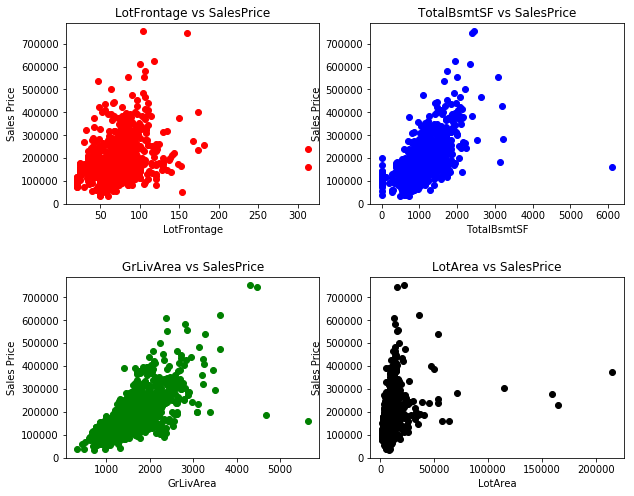

In [5]:
feat_columns = ['LotFrontage', 'TotalBsmtSF', 'GrLivArea', 'LotArea']
color = ['red', 'blue', 'green', 'black']

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 8))
plt.subplots_adjust(hspace=0.4)
for i,j in np.ndindex(axes.shape):
    axes[i, j].scatter(x = X[feat_columns[2*i + j]], y= y, color = color[2*i + j])
    axes[i, j].set(xlabel = feat_columns[2*i + j], ylabel = 'Sales Price', title = '{} vs SalesPrice'.format(feat_columns[2*i + j]))
plt.show()

/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1246: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1253: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1261: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1262: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


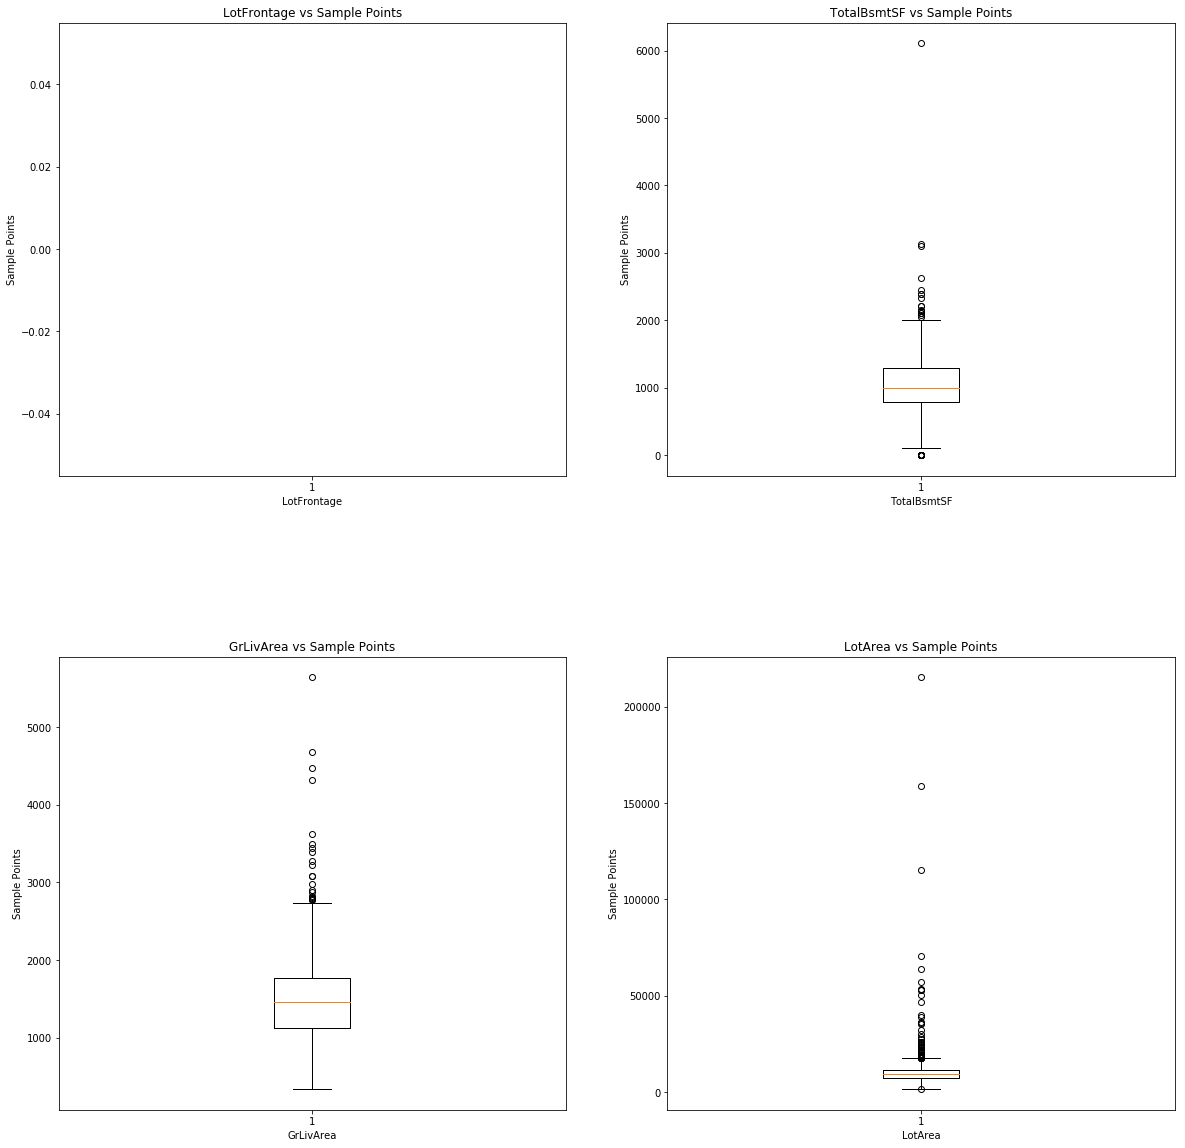

,LotFrontage,PoolQC,TotalBsmtSF,GrLivArea,LotArea,SaleCondition,GarageType,SalePrice
455,80.0,NaN,1242,1242,9600,Normal,Attchd,175500
863,70.0,NaN,1148,1148,7931,Normal,Attchd,132500
504,24.0,NaN,855,1322,2308,Normal,Attchd,147000
1413,88.0,NaN,1844,1844,10994,Abnorml,Attchd,257000
1389,60.0,NaN,735,1218,6000,Normal,Detchd,131000
1091,24.0,NaN,600,1252,2160,Normal,Detchd,160000
590,64.0,NaN,770,1582,8320,Normal,Attchd,185900
1255,52.0,NaN,884,1367,6240,Normal,Detchd,127500
1202,50.0,NaN,884,1348,6000,Normal,Detchd,117000
573,76.0,NaN,384,1430,9967,Normal,BuiltIn,170000


In [6]:
train = pd.concat([X_train, y_train], axis = 1)

train.head()

feat_columns = ['LotFrontage', 'TotalBsmtSF', 'GrLivArea', 'LotArea']

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 20))
plt.subplots_adjust(hspace=0.4)
for i,j in np.ndindex(axes.shape):
    axes[i, j].boxplot(x = train[feat_columns[2*i + j]])
    axes[i, j].set(xlabel = feat_columns[2*i + j], ylabel = 'Sample Points', title = '{} vs Sample Points'.format(feat_columns[2*i + j]))
plt.show()

def create_mask(column_name, threshold):
    return train[column_name] < threshold

mask1 = create_mask('LotFrontage', 300)
mask2 = create_mask('TotalBsmtSF', 5000)
mask3 = create_mask('GrLivArea', 4500)
mask4 = create_mask('LotArea', 100000)

train = train[mask1 & mask2 & mask3 & mask4]

train

In [7]:
X_train, y_train = train.iloc[:,:7], train[['SalePrice']]

In [8]:
X_train.head()

,LotFrontage,PoolQC,TotalBsmtSF,GrLivArea,LotArea,SaleCondition,GarageType
455,80.0,NaN,1242,1242,9600,Normal,Attchd
863,70.0,NaN,1148,1148,7931,Normal,Attchd
504,24.0,NaN,855,1322,2308,Normal,Attchd
1413,88.0,NaN,1844,1844,10994,Abnorml,Attchd
1389,60.0,NaN,735,1218,6000,Normal,Detchd


In [9]:
missing_columns = []
for columns in X_train :
    missing_columns.append((X_train[columns].isnull().sum()/len(X_train[columns]))*100)

mask = [True if nulls > 50 else False for nulls in missing_columns]

missing_columns = pd.Series(data = missing_columns)

columns = X_train.columns[missing_columns[mask].index.tolist()].tolist()

columns

['PoolQC']

In [10]:
dict_new = {'Attchd':0,'Detchd':1,'BuiltIn':2,'2Types':3,'CarPort':4,'Basment':5}
X_train['GarageType'] = X_train['GarageType'].map(dict_new)
X_test['GarageType'] = X_test['GarageType'].map(dict_new)

# Custom imputers
mean_imputer = Imputer(strategy='mean')
mode_imputer = Imputer(strategy='most_frequent')

X_train.info()

X_test.info()

X_train.drop(columns = 'PoolQC', axis=1, inplace=True)
X_test.drop(columns = 'PoolQC', axis=1, inplace=True)

X_train.info()

Imputer = mode_imputer.fit(X = X_train[['GarageType']])

X_train['GarageType'] = mode_imputer.transform(X_train[['GarageType']])

X_test['GarageType'] = mode_imputer.transform(X_test[['GarageType']])

Imputer = mean_imputer.fit(X=X_train[['LotFrontage']])

X_train['LotFrontage'] = mean_imputer.transform(X_train[['LotFrontage']])

X_test['LotFrontage'] = mean_imputer.transform(X_test[['LotFrontage']])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 963 entries, 455 to 1192
Data columns (total 7 columns):
LotFrontage      963 non-null float64
PoolQC           4 non-null object
TotalBsmtSF      963 non-null int64
GrLivArea        963 non-null int64
LotArea          963 non-null int64
SaleCondition    963 non-null object
GarageType       902 non-null float64
dtypes: float64(2), int64(3), object(2)
memory usage: 60.2+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 292 entries, 503 to 318
Data columns (total 7 columns):
LotFrontage      234 non-null float64
PoolQC           2 non-null object
TotalBsmtSF      292 non-null int64
GrLivArea        292 non-null int64
LotArea          292 non-null int64
SaleCondition    292 non-null object
GarageType       276 non-null float64
dtypes: float64(2), int64(3), object(2)
memory usage: 18.2+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 963 entries, 455 to 1192
Data columns (total 6 columns):
LotFrontage      963 non-null float64
Tota

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/anac

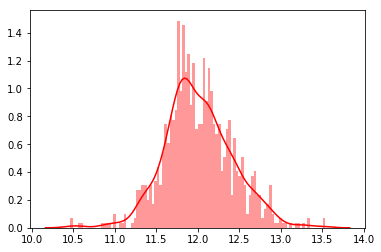

In [11]:
#sns.distplot(y_train, bins = 100, color = 'red')

y_train = np.log(y_train)

sns.distplot(y_train, bins = 100, color = 'red')

#y_train.describe()

In [12]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 963 entries, 455 to 1192
Data columns (total 6 columns):
LotFrontage      963 non-null float64
TotalBsmtSF      963 non-null int64
GrLivArea        963 non-null int64
LotArea          963 non-null int64
SaleCondition    963 non-null object
GarageType       963 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 52.7+ KB


In [13]:
#num_columns = [cols for cols in X_train.select_dtypes(exclude='object')]

In [14]:
num_columns = ['LotFrontage', 'TotalBsmtSF', 'GrLivArea', 'LotArea']

In [15]:
num_columns

['LotFrontage', 'TotalBsmtSF', 'GrLivArea', 'LotArea']

In [16]:
normalizer = MinMaxScaler()

for feature in num_columns:
    normalizer.fit(X_train[[feature]])
    X_train[feature] = normalizer.transform(X_train[[feature]])
    X_test[feature] = normalizer.transform(X_test[[feature]])

X_train.head()

X_test.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype i

,LotFrontage,TotalBsmtSF,GrLivArea,LotArea,SaleCondition,GarageType
503,0.490683,0.485133,0.354177,0.203871,Normal,0.0
101,0.347826,0.239496,0.337518,0.111555,Normal,0.0
608,0.354037,0.311894,0.690488,0.154307,Alloca,5.0
1089,0.099379,0.403038,0.220425,0.026543,Normal,0.0
819,0.142857,0.438914,0.247224,0.070637,Partial,0.0


In [17]:
label_encoder = LabelEncoder()

X_train['SaleCondition'] = label_encoder.fit_transform(X_train['SaleCondition'])

X_test['SaleCondition'] = label_encoder.fit_transform(X_test['SaleCondition'])

x_train = pd.get_dummies(data = X_train['GarageType'])
x_test = pd.get_dummies(data = X_test['GarageType'])

x_train.head()
x_test.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,0.0,1.0,2.0,3.0,4.0,5.0
503,1,0,0,0,0,0
101,1,0,0,0,0,0
608,0,0,0,0,0,1
1089,1,0,0,0,0,0
819,1,0,0,0,0,0




# ===============EDA Assessment======================



In [18]:
path = '/Users/raisaurabh04/OneDrive/GreyAtom/Practice Dataset/googleplaystore_eda.csv'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


,Rating
count,9366.000000
mean,4.191757
std,0.515219
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


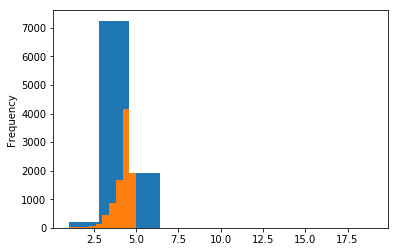

In [19]:
data = pd.read_csv(path)

data.head()

data.info()

data.describe()

data['Rating'].plot(kind = 'hist')
data.shape

data = data[data['Rating'] <= 5]

data.shape

data['Rating'].plot(kind = 'hist')
data.describe()

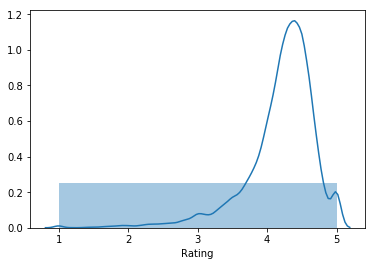

In [20]:
sns.distplot(data['Rating'], bins=1)

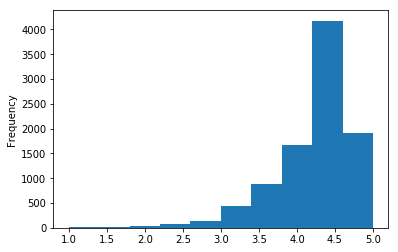

In [21]:
data['Rating'].plot(kind = 'hist')

In [22]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [23]:
total_null = data.isnull().sum()
total_null.head()

percent_null = total_null/data.isnull().count()
percent_null.head()

missing_data = pd.concat([total_null, percent_null], axis = 1, keys=['Total','Percent'])

print(missing_data)

                Total   Percent
App                 0  0.000000
Category            0  0.000000
Rating              0  0.000000
Reviews             0  0.000000
Size                0  0.000000
Installs            0  0.000000
Type                0  0.000000
Price               0  0.000000
Content Rating      0  0.000000
Genres              0  0.000000
Last Updated        0  0.000000
Current Ver         4  0.000427
Android Ver         2  0.000214


In [24]:
data.dropna(axis=0,inplace=True)

total_null_1 = data.isnull().sum()
total_null_1.head()

percent_null_1 = total_null_1/data.isnull().count()
percent_null_1.head()

missing_data_1 = pd.concat([total_null_1, percent_null_1], axis = 1, keys=['Total','Percent'])

print(missing_data_1)

                Total  Percent
App                 0      0.0
Category            0      0.0
Rating              0      0.0
Reviews             0      0.0
Size                0      0.0
Installs            0      0.0
Type                0      0.0
Price               0      0.0
Content Rating      0      0.0
Genres              0      0.0
Last Updated        0      0.0
Current Ver         0      0.0
Android Ver         0      0.0


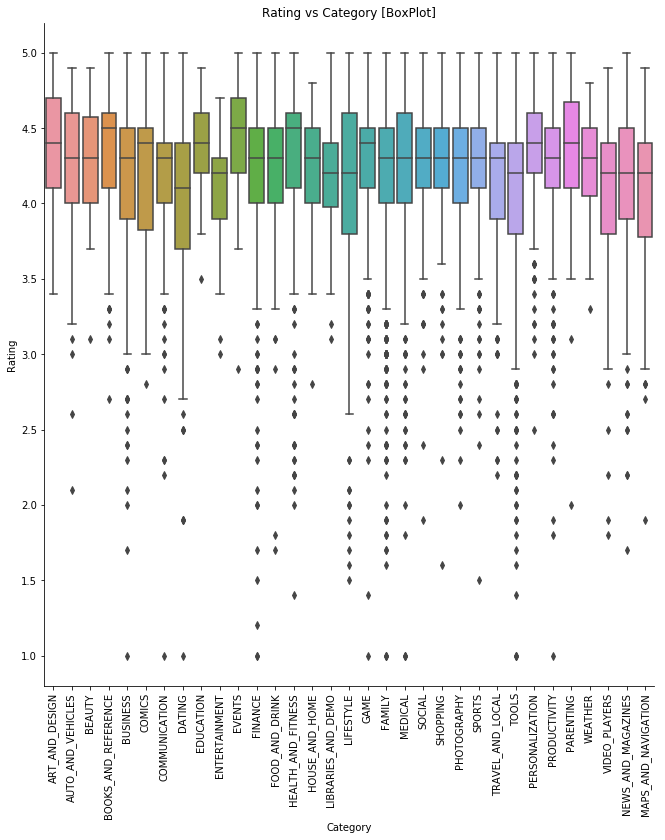

In [25]:
sns.catplot(x="Category",y="Rating",data=data, kind="box", height = 10)
plt.xticks(rotation = 90)
plt.title('Rating vs Category [BoxPlot]')
plt.show()

In [26]:
data['Installs'].min(),data['Installs'].max()

('1+', '500,000,000+')

In [27]:
data['Installs']

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
5            50,000+
6            50,000+
7         1,000,000+
8         1,000,000+
9            10,000+
10        1,000,000+
11        1,000,000+
12       10,000,000+
13          100,000+
14          100,000+
16          500,000+
17           10,000+
18        5,000,000+
19       10,000,000+
20          100,000+
21          100,000+
22          500,000+
24           50,000+
25           10,000+
26          500,000+
27          100,000+
28           10,000+
29          100,000+
30          100,000+
31           50,000+
            ...     
10795       100,000+
10796     1,000,000+
10797     1,000,000+
10799       100,000+
10800         5,000+
10801         1,000+
10802        10,000+
10803     1,000,000+
10804       100,000+
10805           100+
10809     1,000,000+
10810           100+
10812         1,000+
10814        50,000+
10815       500,000+
10817       100,000+
10819        

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
App               9360 non-null object
Category          9360 non-null object
Rating            9360 non-null float64
Reviews           9360 non-null object
Size              9360 non-null object
Installs          9360 non-null int64
Type              9360 non-null object
Price             9360 non-null object
Content Rating    9360 non-null object
Genres            9360 non-null object
Last Updated      9360 non-null object
Current Ver       9360 non-null object
Android Ver       9360 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 1.3+ MB


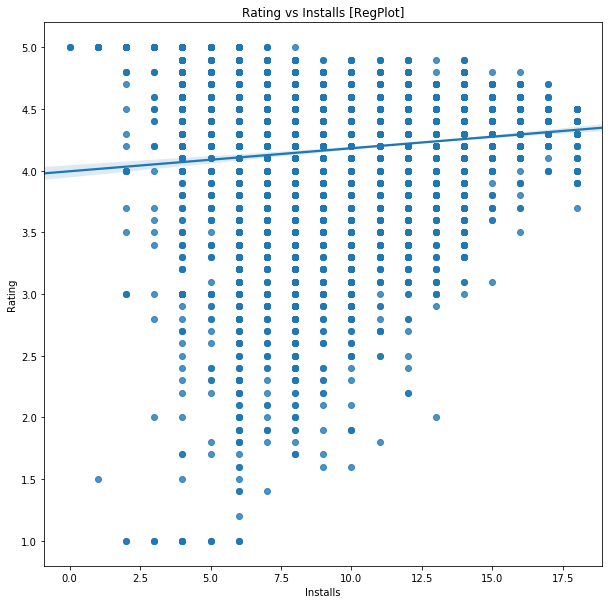

In [28]:
data['Installs'] = data['Installs'].str.replace('+', '').str.replace(',', '').astype('int64')

data.info()

data.head()

le = LabelEncoder()

data['Installs'] = le.fit_transform(data['Installs'])

plt.figure(figsize=(10,10))
sns.regplot(x = 'Installs', y = 'Rating', data = data)
plt.title('Rating vs Installs [RegPlot]')
plt.show()

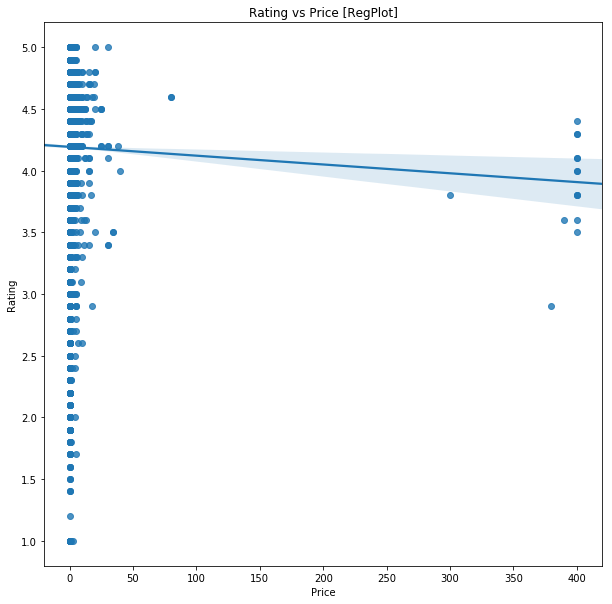

In [29]:
data['Price'] = data['Price'].str.replace('$', '').astype('float64')

data[data["Price"] != 0]

plt.figure(figsize=(10,10))
sns.regplot(x = 'Price', y = 'Rating', data = data)
plt.title('Rating vs Price [RegPlot]')
plt.show()

In [46]:
genre = data['Genres'].unique().tolist()

data['Genres'] = list(map(lambda x : x.split(';')[0], data['Genres'].tolist()))

gr_mean = data.groupby(by = 'Genres', as_index=False)[['Genres', 'Rating']].mean()

gr_mean.describe()

gr_mean = gr_mean.sort_values(by = 'Rating')

gr_mean.head(1)

gr_mean.tail(1)

,Genres,Rating
18,Events,4.435556


In [54]:
data['Last Updated'] = pd.to_datetime(data['Last Updated'])

max_date = data['Last Updated'].max()


data['Last Updated Days'] = data['Last Updated'].max() - data['Last Updated']

data['Last Updated Days'] = data['Last Updated Days'].dt.days

sns.regplot(x="Last Updated Days", y="Rating", data=data)
plt.title('Rating vs Last Updated [RegPlot]')
plt.show()

In [ ]:
plt.plot([1,2,3,4], lin)
plt.show()